# Custom Anomaly Detector

It is very simple to implement a custom anomaly detector in `dtaianomaly`. Here we implement a simple algorithm that uses the $N-\sigma$ rule to detect anomalies (i.e., an observation is anomalous if it is more than $N$ standard deviations away from the mean). 

In [1]:
import numpy as np
from typing import Dict, Optional

from dtaianomaly.anomaly_detection import TimeSeriesAnomalyDetector, TrainType


class NSigmaAnomalyDetector(TimeSeriesAnomalyDetector):

    def __init__(self, nb_sigmas: float = 3):
        super().__init__()
        self.__nb_sigmas: float = nb_sigmas
        self.__mean: Optional[float] = None
        self.__std: Optional[float] = None
        
    def train_type(self) -> TrainType:
        return TrainType.UNSUPERVISED  # If the method is supervised, unsupervised, or semi-supervised

    def _fit(self, trend_data: np.ndarray, labels: Optional[np.array] = None):
        self.__mean = trend_data.mean()
        self.__std = trend_data.std()

    def _decision_function(self, trend_data: np.ndarray) -> np.array:
        return np.abs(trend_data - self.__mean) > self.__nb_sigmas * self.__std

    @staticmethod
    def load(parameters: Dict[str, any]) -> 'TimeSeriesAnomalyDetector':
        return NSigmaAnomalyDetector(parameters['nb_sigmas'])

Now, we can use the custom anomaly detector to detect anomalies! For this, we first will load a data set, fit the anomaly detector, and show the anomalies. Typically, $N=3$ is chosen. However, here we manually tuned the value to obtain better visualizations. 

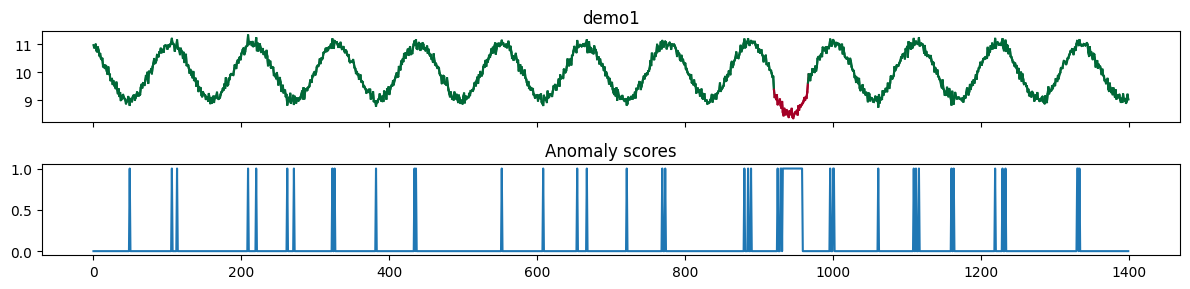

In [2]:
from dtaianomaly.data_management import DataManager
from dtaianomaly.visualization import plot_anomaly_scores

data_manager = DataManager('../data/datasets.csv')
dataset_index = data_manager.select({'collection_name': 'Demo'}).get(0)
trend_data, ground_truth = data_manager.load_raw_data(dataset_index)
trend_data_df = data_manager.load(dataset_index)

# 
anomaly_detector = NSigmaAnomalyDetector(nb_sigmas=1.5)
anomaly_detector.fit(trend_data)

fig = plot_anomaly_scores(
    trend_data_df, 
    anomaly_detector.decision_function(trend_data),
    show_anomaly_scores='separate',
    show_ground_truth="overlay"
)
fig.set_size_inches(12, 3)
fig.tight_layout()